In [ ]:
!pip3 install ktrain
import pandas as pd
import numpy as np
 
import ktrain
from ktrain import text

     |████████████████████████████████| 25.3 MB 8.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
     |████████████████████████████████| 981 kB 39.1 MB/s 
     |████████████████████████████████| 263 kB 45.5 MB/s 
     |████████████████████████████████| 2.8 MB 42.6 MB/s 
     |████████████████████████████████| 1.2 MB 48.5 MB/s 
     |████████████████████████████████| 468 kB 45.4 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 50.2 MB/s 
     |████████████████████████████████| 3.3 MB 53.0 MB/s 
     |████████████████████████████████| 596 kB 62.9 MB/s 
  Created wheel for ktrain: filename=ktrain-0.29.2-py3-none-any.whl size=25294171 sha256=56e83aebdd5403bb45511da012fa83ad022b34f2006e05f1f1927f1f8e3c9f66
  Stored in directory: /root/.cache/pip/wheels/db/b1/ad/94fe0ceeaa8ed0319e74773cba99b6aa6192998b1035adc295
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9931 sha256=f149a8c01aabe758

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/NewsComments/Dataset/news_comments.xlsx")

In [ ]:
data.sort_values(by='Class', axis=0, inplace=True)

data.set_index(keys=['Class'], drop=False,inplace=True)

Emojis=data['Class'].unique().tolist()

In [ ]:
data_train = pd.read_excel('/content/drive/MyDrive/NewsComments/Dataset/news_comments.xlsx')
data_train['Data'] = data_train['Data'].astype(str)

data_test = pd.read_excel('/content/drive/MyDrive/NewsComments/Dataset/news_comments.xlsx')
data_test['Data'] = data_train['Data'].astype(str)


X_train = data_train.Data.tolist()
X_test = data_test.Data.tolist()

y_train = data_train.Class.tolist()
y_test = data_test.Class.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['Positive', 'Very Positive', 'Neutral','Negative', 'Very Negative']

print('size of training set: %s' % (len(data_train['Data'])))
print('size of validation set: %s' % (len(data_test['Data'])))
print(data.Class.value_counts())

data.head(10)

size of training set: 13802
size of validation set: 13802
Very Negative    7856
Negative         6396
Neutral          5902
Very Positive    4560
Positive         2890
Name: Class, dtype: int64


,SL,Data,Class
0,0.0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,Negative
1,1.0,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,Negative
2,2.0,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,Very Negative
3,3.0,চুরি নয় লুটপাট।,Very Negative
4,4.0,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,Neutral
5,5.0,একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ!,Very Negative
6,6.0,সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...,Very Negative
7,7.0,পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না!,Negative
8,8.0,এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে।,Negative
9,9.0,ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...,Negative


In [ ]:
encoding = {
    'Positive': 0,
    'Very Positive': 1,
    'Neutral': 2,
    'Negative': 3,
    'Very Negative': 4
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='standard',
                                                                       maxlen=1000, 
                                                                       max_features=350000)

language: bn
Word Counts: 38495
Nrows: 13802
13802 train sequences
train sequence lengths:
	mean : 20
	95percentile : 57
	99percentile : 83
x_train shape: (13802,1000)
y_train shape: (13802, 5)
Is Multi-Label? False
13802 test sequences
test sequence lengths:
	mean : 20
	95percentile : 57
	99percentile : 83
x_test shape: (13802,1000)
y_test shape: (13802, 5)
task: text classification


In [ ]:
model = text.text_classifier('fasttext', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 1000
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=512)

In [ ]:
hist= learner.fit_onecycle(2e-5, 250)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/250
27/27 [==============================] - 7s 49ms/step - loss: 2.1090 - accuracy: 0.2126 - val_loss: 1.6041 - val_accuracy: 0.2851
Epoch 2/250
27/27 [==============================] - 1s 40ms/step - loss: 2.1099 - accuracy: 0.2105 - val_loss: 1.6046 - val_accuracy: 0.2849
Epoch 3/250
27/27 [==============================] - 1s 39ms/step - loss: 2.0840 - accuracy: 0.2221 - val_loss: 1.6050 - val_accuracy: 0.2842
Epoch 4/250
27/27 [==============================] - 1s 41ms/step - loss: 2.1134 - accuracy: 0.2153 - val_loss: 1.6053 - val_accuracy: 0.2823
Epoch 5/250
27/27 [==============================] - 1s 39ms/step - loss: 2.1008 - accuracy: 0.2182 - val_loss: 1.6054 - val_accuracy: 0.2805
Epoch 6/250
27/27 [==============================] - 1s 41ms/step - loss: 2.1164 - accuracy: 0.2140 - val_loss: 1.6055 - val_accuracy: 0.2781
Epoch 7/250
27/27 [==============================] - 1s 40ms/step - loss: 2.1115 - ac

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

               precision    recall  f1-score   support

     Positive       0.94      0.05      0.10      1445
Very Positive       0.87      0.35      0.50      2280
      Neutral       0.61      0.71      0.66      2951
     Negative       0.52      0.84      0.64      3198
Very Negative       0.70      0.75      0.72      3928

     accuracy                           0.62     13802
    macro avg       0.73      0.54      0.52     13802
 weighted avg       0.69      0.62      0.59     13802



array([[  78,   43,  370,  545,  409],
       [   1,  798,  328,  828,  325],
       [   1,   26, 2104,  531,  289],
       [   0,   30,  256, 2671,  241],
       [   3,   25,  388,  571, 2941]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['Positive', 'Very Positive', 'Neutral', 'Negative', 'Very Negative']

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
import itertools
import matplotlib.pyplot as plt

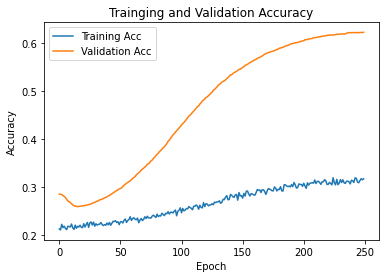

In [ ]:
# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Trainging and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Validation Acc'], loc='upper left')
plt.show()

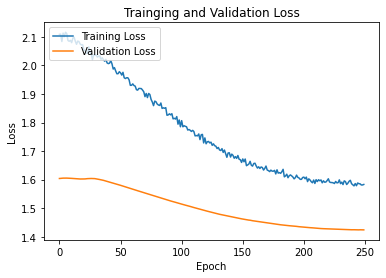

In [ ]:
# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Trainging and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

print(precision_recall_fscore_support(data_test.Class, predictions, average = 'weighted', zero_division= 'warn'))

(0.6912224696184626, 0.6225184755832488, 0.5878435517866303, None)



F1 Score: 62.25


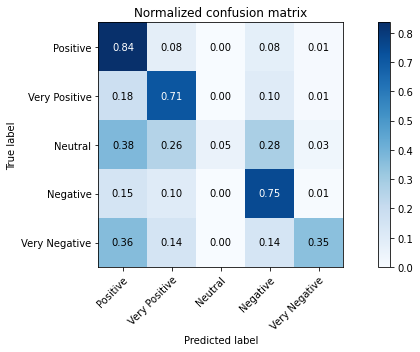

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=confusion_matrix,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(10, 5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("\nF1 Score: {:.2f}".format(f1_score(data_test.Class, predictions, average='micro') * 100))

plot_confusion_matrix(data_test.Class, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
#plot_confusion_matrix(y_true,y_pred,classes=class_names)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(data_test.Class, predictions)))

print('Micro Precision: {:.2f}'.format(precision_score(data_test.Class, predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(data_test.Class, predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(data_test.Class, predictions, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(data_test.Class, predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(data_test.Class, predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(data_test.Class, predictions, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(data_test.Class, predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(data_test.Class, predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(data_test.Class, predictions, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(data_test.Class, predictions, target_names=class_names))


Accuracy: 0.62

Micro Precision: 0.62
Micro Recall: 0.62
Micro F1-score: 0.62

Macro Precision: 0.73
Macro Recall: 0.54
Macro F1-score: 0.52

Weighted Precision: 0.69
Weighted Recall: 0.62
Weighted F1-score: 0.59

Classification Report

               precision    recall  f1-score   support

     Positive       0.52      0.84      0.64      3198
Very Positive       0.61      0.71      0.66      2951
      Neutral       0.94      0.05      0.10      1445
     Negative       0.70      0.75      0.72      3928
Very Negative       0.87      0.35      0.50      2280

     accuracy                           0.62     13802
    macro avg       0.73      0.54      0.52     13802
 weighted avg       0.69      0.62      0.59     13802



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn import metrics

cm = confusion_matrix(data_test.Class,predictions)

TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))

Sensitivity :  0.8341661461586508
Specificity :  0.8915254237288136
false positive rate :  0.10847457627118644
false negative rate :  0.16583385384134916
Negative Predictive Value :  0.7984819734345351
False Discovery rate :  0.08746156474205671


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,model.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,model.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))
print('Cohen_Kappa_Score:', cohen_kappa_score(data_test.Class, predictions))

Mean Absolute Error: 0.30194235
Mean Squared Error: 0.14406708
Root Mean Squared Error: 0.3795617
Cohen_Kappa_Score: 0.5045234502641652


In [ ]:
#Positive
import time 

message = 'এটা ভুলে গেলে চলবে না যে ব্যাংকটিতে নুতন পরিচালনা পর্ষদ এসেছে তাদের ব্যাংকটির সব কিছু বুঝে উঠতে একটু সময় লাগবে এটাই স্বাভাবিক'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: Neutral (0.15)


In [ ]:
#Negative
import time 

message = 'বিগত কয়েক বছরের অভিজ্ঞতা বলে ব্যাংকসহ শ্যেনদৃষ্টি যেখানে সর্বনাশ সেখানে'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: Negative (0.04)


In [ ]:
#Neutral
import time 

message = 'আমি চাইতে সমস্যা কি দাম চাইলাম যা দ্যান'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: Neutral (0.04)


In [ ]:
#Very Positive
import time 

message = 'তাহলে তো রডের দাম আরো কমবে'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: Neutral (0.04)


In [ ]:
#Very Negative
import time 

message = 'জনসংখ্যা আর আয়তনের হিসাবে পাকিস্তানই বেশী পেয়েছে'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: Negative (0.05)


In [ ]:
predictor.save("models/bert_model")